In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from Data import DataLoader
from DataLoader import Data
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn.neighbors import KNeighborsClassifier
from Evaluation import Evaluate
from sklearn.model_selection import GridSearchCV
import pickle

df=Data.load_data('music.csv')
trainx,testx,trainy,testy=Data.prepare_data(df,label_dict={
    'final_blues':0,
    'final_classical':1,
    'final_country':2,
    'final_disco':3,
    'final_hiphop':4,
    'final_jazz':5,
    'final_metal':6,
    'final_pop':7,
    'final_reggae':8,
    'final_rock':9
})    

Data Loaded, Shape : 10000 ,343


In [11]:
#Standardizing data

sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.transform(testx)


'''
Hyperparameters:

Only hyperparameter we are using here is the number of nearest neighbors.
The number of nearest neighbors, or K values range from sqrt(total_samples)-5 to sqrt(total_samples)+5

Scoring:

For scoring the model, we are using f1-macro score.


'''
k_range = list(range(int(math.sqrt(trainx.shape[0])/2)-5,int(math.sqrt(trainx.shape[0])*2)+5))

param_grid = dict(n_neighbors=k_range)



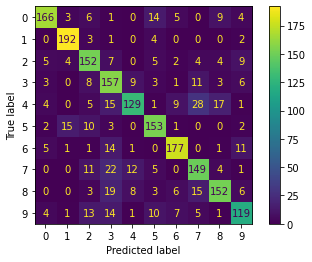

Acc :0.77
F1 0.77


In [15]:
knn= KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,scoring='f1_macro',return_train_score=False,verbose=1)
g_search=grid.fit(trainx,trainy)
final_knn=KNeighborsClassifier(n_neighbors=g_search.best_params_['n_neighbors'])
final_knn.fit(trainx,trainy)

'''
Evaluation:

We are evaluating the model in terms of the  f1-score and accuracy


preds=final_knn.predict(testx)
ev=Evaluate(true_labels=testy,preds=preds)
accuracy,f1=ev.calc_eval()

In [16]:
#Saving model..

In [17]:
model_name="knn_341.pickle"
pickle.dump(final_knn, open(model_name, "wb"))